### K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a machine learning algorithm used for classification or regression based on proximity to other data points. It is a non-parametric, supervised learning algorithm.

---

### 🔢 How KNN Algorithm Works

1. Assign a value to **K** (number of nearest neighbors).
2. Calculate the distance between the new data point and all existing data points in the training set.
3. Sort all distances in **ascending order**.
4. Select the **K nearest neighbors** based on the shortest distances.
5. Perform majority voting (for classification) or average (for regression) to predict the outcome.

---

### 💡 Key Notes

- KNN does **not do any work during training**. It simply stores the dataset in memory.
- When a new input arrives during testing, it calculates the distance to all training samples, sorts them, and predicts the class/value based on the K closest points.
- Because it does all the work during prediction and none during training, it is called a **lazy learner**.
- The value of **K should ideally be odd** to avoid tie situations in classification.
- A **very small K** may lead to **overfitting**, while a **very large K** may lead to **underfitting**. Hence, K must be chosen carefully, often using cross-validation.

---

### ⚠️ Limitations of KNN

1. **Not suitable for large datasets**  
   Since KNN stores the whole dataset and performs calculations during testing, it becomes very slow with large data.

2. **High Dimensionality (Curse of Dimensionality)**  
   When there are many features, calculating distance becomes less reliable, and performance degrades.

3. **Sensitive to Outliers**  
   Outliers can negatively impact the model's performance, leading to incorrect predictions.

4. **Non-Homogeneous Feature Scaling**  
   If features are not scaled properly (e.g., some are in different ranges), distance calculations become inaccurate. Scaling is crucial.

5. **Imbalanced Datasets**  
   If one class dominates the dataset, KNN may become biased toward the majority class.

6. **Not suitable for inference**  
   While KNN is simple and works well for some problems, it is not the best model for deriving relationships between variables or inference tasks.

---

### ⏱️ Time and Space Complexity

- **Time Complexity**: O(n·d)  
  Where:  
  - *n* = number of training samples  
  - *d* = number of features  

- **Space Complexity**: O(n·d)  
  As the algorithm stores the entire training data in memory.


### Assumptions of KNN Algorithm

K-Nearest Neighbors (KNN) relies on several important assumptions to perform effectively:

1. **Similar Instances Have Similar Outcomes**  
   KNN assumes that data points close to each other in the feature space are likely to have similar target values. This is known as the **locality assumption**.

2. **Features Contribute Meaningfully to Similarity**  
   KNN assumes that all features are relevant and contribute appropriately to the distance metric. **Irrelevant or noisy features** can distort similarity calculations.

3. **Appropriate Distance Metric is Used**  
   KNN relies on a distance metric (e.g., **Euclidean**, **Manhattan**) to measure similarity. It assumes that the chosen metric **accurately reflects** relationships in the data.

4. **Features are Scaled and Homogeneous**  
   Since distance calculations are sensitive to feature magnitudes, KNN assumes that features are on the **same scale**. Feature **standardization or normalization** is typically required.

5. **Sufficient Data Density**  
   KNN assumes that there is **enough data density** so that local neighborhoods are meaningful for making predictions.

6. **No Missing Data**  
   KNN assumes that the dataset does **not contain missing values**, as these can disrupt distance calculations.

7. **Balanced Dataset for Classification**  
   For classification tasks, KNN assumes a **balanced class distribution**. If the dataset is imbalanced, the algorithm may be **biased toward the majority class**.

---

### **Interview Tip**  
KNN's performance depends on practical assumptions like:  
- Local similarity of instances  
- Meaningful and scaled features  
- Proper distance metric  
- Adequate data density  
- Balanced class distribution (in classification)  

Keeping these assumptions in mind ensures the model gives reliable and interpretable results.


## 📘 KNN Regressor (K-Nearest Neighbors Regression)

K-Nearest Neighbors (KNN) Regressor is a **non-parametric**, **instance-based** supervised learning algorithm used for **regression** tasks. Instead of trying to learn a model from the training data, it **memorizes** the data and **makes predictions based on the average** of the nearest neighbors.

---

### ✅ How KNN Regression Works

1. Choose the number of neighbors `k`.
2. For a new input point, calculate the distance to all points in the training set.
3. Sort and select the `k` closest points (neighbors).
4. Predict the target as the **average of these `k` neighbors' target values**.

---

### 🧮 Distance Metrics

- **Euclidean Distance** (default):
  $$
  d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
  $$
- **Manhattan Distance**:
  $$
  d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
  $$

The choice of metric can affect prediction accuracy.

---

### 📊 Key Characteristics

- **Lazy Learner**: No training is done; the algorithm waits until prediction.
- **Non-linear**: Works well for non-linear data without assuming any form of the function.
- **Sensitive to Feature Scaling**: All features should be normalized or standardized.
- **Affected by Outliers**: Can be impacted heavily by noisy or irrelevant features.

---

### 📉 Bias-Variance Tradeoff in KNN Regressor

- **Low k** → Low bias, high variance (overfitting).
- **High k** → High bias, low variance (underfitting).
- A moderate value of `k` is preferred for generalization.

---

### 🚫 Limitations

- Slow for large datasets (because it calculates distance for all points).
- Inefficient with **high-dimensional data** (curse of dimensionality).
- Poor performance with **imbalanced** or **sparse** datasets.
- Requires **clean and scaled data** for reliable predictions.

---

### 🛠️ When to Use

- Small to medium-sized datasets.
- When data is likely to have **local continuity** in the target variable.
- When you need a **simple and interpretable model**.

---

### 🧪 Scikit-learn Example




Mean Squared Error: 239.813691338355
      X_test     Actual  Predicted
7  -1.763040 -65.694514 -81.923495
0  -1.328186 -45.703646 -68.786957
12 -1.220844 -37.855516 -56.806911
14 -1.150994 -60.071156 -44.735293
13 -0.529760 -21.483073 -23.865556


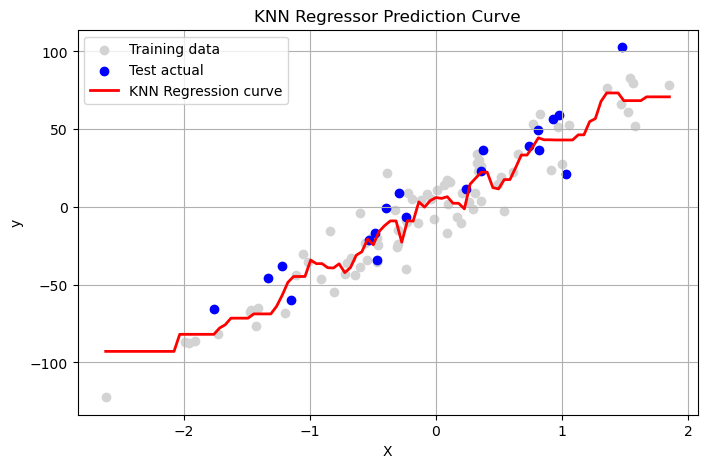

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict across full input range for smoother curve
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_scaled = scaler.transform(X_line)
y_line_pred = knn.predict(X_line_scaled)

# Create a comparison DataFrame
df_results = pd.DataFrame({
    "X_test": X_test.flatten(),
    "Actual": y_test,
    "Predicted": y_pred
})
print(df_results.sort_values(by="X_test").head())

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="lightgray", label="Training data")
plt.scatter(X_test, y_test, color="blue", label="Test actual")
plt.plot(X_line, y_line_pred, color="red", label="KNN Regression curve", linewidth=2)
plt.title("KNN Regressor Prediction Curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## 📘 KNN Classifier (K-Nearest Neighbors Classification)

**K-Nearest Neighbors (KNN)** is a **non-parametric**, **instance-based**, and **lazy learning** algorithm used for **classification**. It works by finding the **k-nearest data points** (neighbors) to a new observation and classifying it based on the **majority vote** among those neighbors.

---

### ✅ How KNN Classification Works

1. Choose a value for **`k`** (number of neighbors).
2. Compute the **distance** from the new input point to all training data points.
3. Sort all the distances and find the **`k` closest points**.
4. Assign the class **most common** among these `k` neighbors to the new data point.

---

### 🧮 Distance Metrics

- **Euclidean Distance** (default):  
  $$
  d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
  $$
- **Manhattan Distance**:  
  $$
  d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
  $$

KNN assumes that the selected distance metric accurately reflects similarity between points.

---

### 🧠 Lazy Learning

- KNN **does not train** a model during the training phase.
- It simply stores the entire dataset.
- Prediction happens **at runtime**, making it **computationally expensive** during inference.

---

### ⚖️ Choosing `k`

- **Small `k`** → More complex decision boundary → High variance (overfitting).
- **Large `k`** → Simpler boundary → High bias (underfitting).
- Use an **odd value of `k`** to avoid ties (especially in binary classification).

---

### ⚠️ Limitations of KNN

1. **Not suitable for large datasets** (slow at prediction).
2. **Sensitive to irrelevant or noisy features**.
3. **Requires feature scaling** (standardization or normalization).
4. **Poor with high-dimensional data** (curse of dimensionality).
5. **Doesn’t handle missing data well**.
6. **Imbalanced datasets** can bias the prediction toward the majority class.

---

### 💡 Tips

- Always **scale features** before applying KNN.
- Use **cross-validation** to find the optimal `k`.
- Consider using **K-D Tree** or **Ball Tree** for faster neighbor search on large datasets.

---

### 🧪 Scikit-learn Example



Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.60      0.67      0.63         9
   virginica       0.70      0.64      0.67        11

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



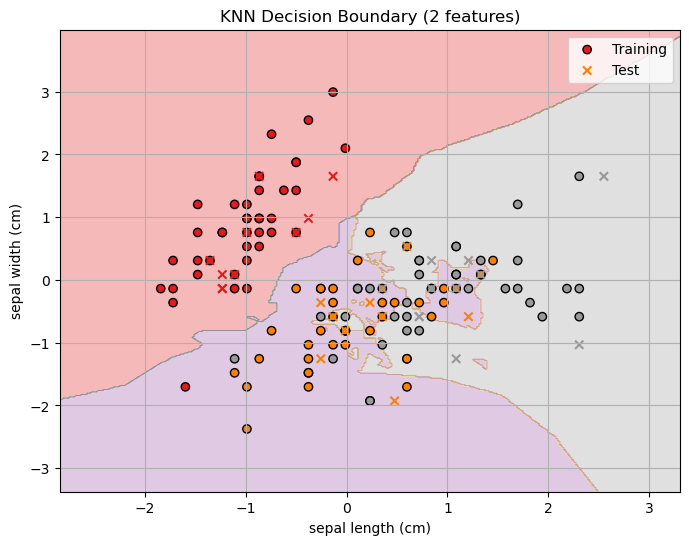

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset and select only the first 2 features for visualization
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
feature_names = iris.feature_names[:2]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1, label='Training')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, marker='x', cmap=plt.cm.Set1, label='Test')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("KNN Decision Boundary (2 features)")
plt.legend()
plt.grid(True)
plt.show()


# General example
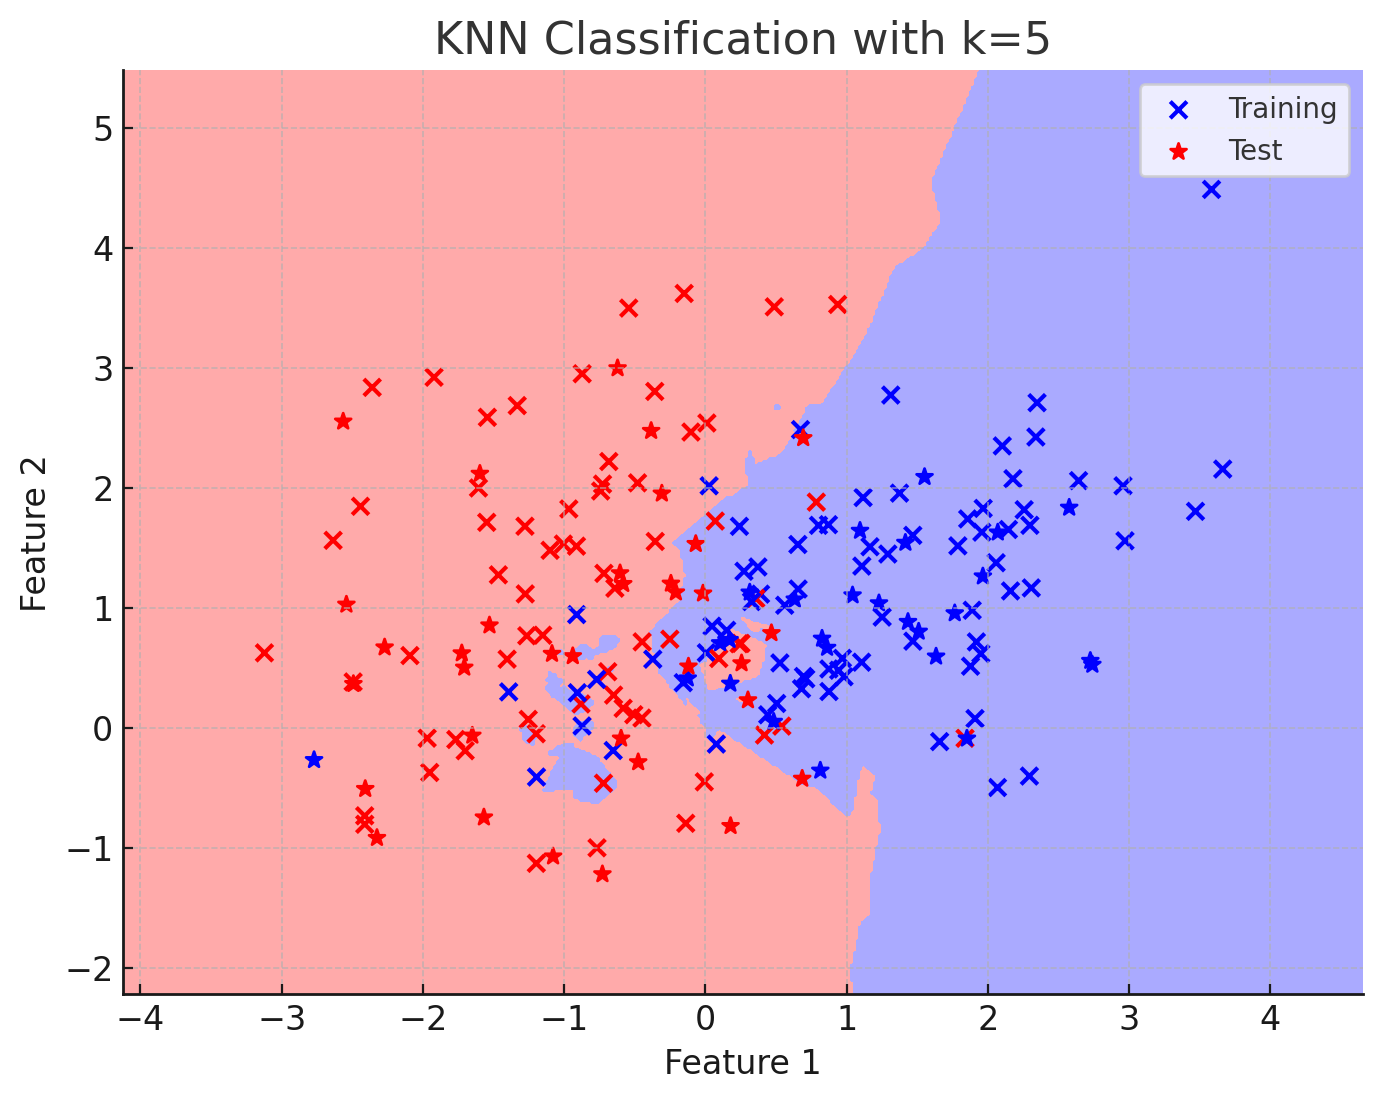